## 파이토치(PyTorch)
- 페이스북 초기 루아(Lua) 언어로 개발된 토치(Torch)를 파이썬 버전으로 개발하여 2017년도에 공개
- 초기에 토치(Torch)는 넘파이(Numpy) 라이브러리처럼 과학 연산을 위한 라이브러리로 공개
- 이후 GPU를 이용한 텐서 조작 및 동적 신경망 구축이 가능하도록 딥러닝 프레임워크로 발전시킴
- 파이썬답게 만들어졌고, 유연하면서도 가속화된 계산 속도를 제공

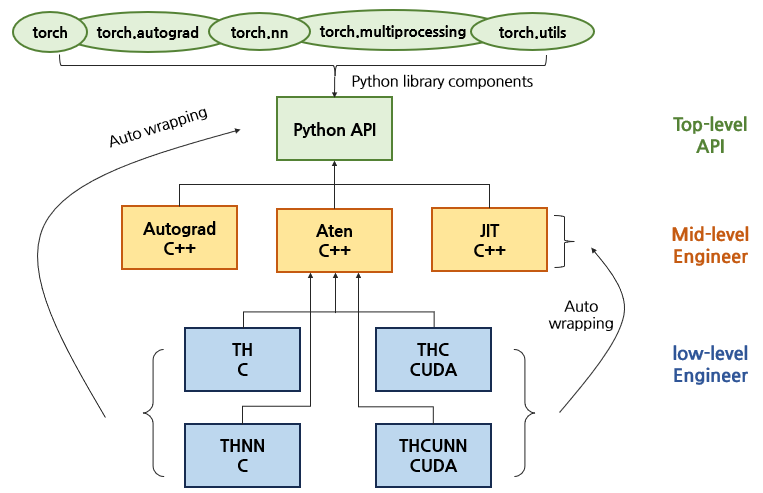

- low-level : 하드웨어 접근이 용이하고, 빠르게 처리하기 위해 저수준의 언어로 작성됨, 고속 병렬처리 가능(GPU연산 가능)
- mid-level
- top-level : python API를 통해 매핑함, 수많은 모듈들이 파이썬에서 동작하도록 구성

## 파이토치의 구성요소
- torch : 메인네임스페이스, 텐서 등의 다양한 수학 함수가 포함
- torch.autograd : 자동 미분 기능을 제공하는 라이브러리
- torch.nn : 신경망 구축을 위한 데이터 구조나 레이어 등의 라이브러리
- torch.multiprocessing : 병렬처리 기능을 제공하는 라이브러리
- torch.optim : SGD(Stochastic Gradient Descent)를 중심으로 한 파라미터 최적화 알고리즘 제공
- torch.utils : 데이터 조작 등 유틸리티 기능 제공
- torch.onnx : ONNX(Open Neural Network Exchange), 서로 다른 프레임워크 간의 모델을 공유할 때 사용

## 텐서(Tensor)
- 데이터 표현을 위한 기본 구조로 텐서(tensor)를 사용
- 텐서는 데이터를 담기위한 컨테이너(container)로서 일반적으로 수치형 데이터를 저장
- 넘파이(Numpy)의 ndarray와 유사
- GPU를 사용한 연간 가속 가능
- 다차원의 개념을 가지고 있고, 다차원의 데이터 표현을 하는데 사용

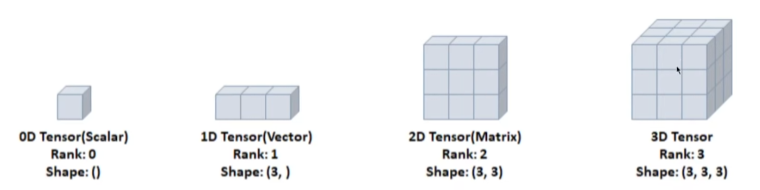
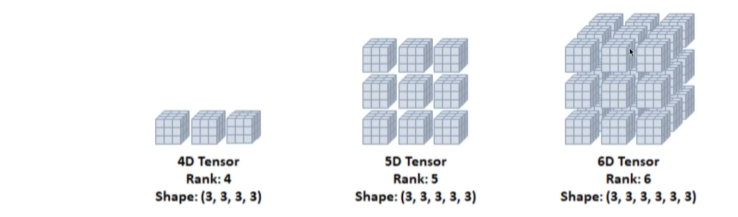

In [5]:
import torch
print(torch.__version__)
print(torch.cuda.is_available())

1.10.1
True


### 텐서 초기화와 데이터 타입

In [6]:
# 초기화 되지 않은 텐서
x = torch.empty(4, 2)
print(x)

tensor([[6.3058e-44, 6.7262e-44],
        [7.5670e-44, 6.3058e-44],
        [7.1466e-44, 6.7262e-44],
        [1.1771e-43, 6.7262e-44]])


In [7]:
# 무작위로 초기화 된 텐서
x = torch.rand(4, 2)
print(x)

tensor([[0.3939, 0.8255],
        [0.2188, 0.1678],
        [0.0972, 0.5004],
        [0.9489, 0.7959]])


In [10]:
# 데이터 타입(dtype)이 long이고, 0으로 채워진 텐서

x = torch.zeros(4, 2, dtype=torch.long)
print(x)

tensor([[0, 0],
        [0, 0],
        [0, 0],
        [0, 0]])


In [11]:
# 사용자가 입력한 값으로 텐서 초기화
x = torch.tensor([3, 2.3])
print(x)

tensor([3.0000, 2.3000])


In [12]:
# 2 x 4 크기, double 타입, 1로 채워진 텐서
x = x.new_ones(2, 4, dtype=torch.double)
print(x)

tensor([[1., 1., 1., 1.],
        [1., 1., 1., 1.]], dtype=torch.float64)


In [13]:
# x와 같은 크기, float 타입, 무작위로 채워진 텐서
x = torch.rand_like(x, dtype=torch.float)
print(x)

tensor([[0.2092, 0.3789, 0.6586, 0.6007],
        [0.6627, 0.5734, 0.2104, 0.9214]])


In [14]:
# 텐서의 크기 계산
print(x.size())

torch.Size([2, 4])


### 데이터 타입(data type)
### 타입 캐스팅(Type Casting)
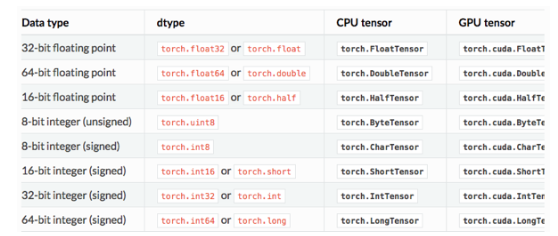


In [15]:
ft = torch.FloatTensor([1, 2, 3])
print(ft)
print(ft.dtype)

tensor([1., 2., 3.])
torch.float32


In [16]:
print(ft.short())
print(ft.int())
print(ft.long())

tensor([1, 2, 3], dtype=torch.int16)
tensor([1, 2, 3], dtype=torch.int32)
tensor([1, 2, 3])


In [17]:
it = torch.IntTensor([1, 2, 3])
print(it)
print(it.dtype)

tensor([1, 2, 3], dtype=torch.int32)
torch.int32


In [18]:
print(it.float())
print(it.double())
print(it.half())

tensor([1., 2., 3.])
tensor([1., 2., 3.], dtype=torch.float64)
tensor([1., 2., 3.], dtype=torch.float16)


### CUDA Tensors
- .to 메소드를 사용하여 텐서를 어떠한 장치(cpu, gpu)로도 옮길 수 있음

In [22]:
x = torch.randn(1)
print(x) # 4자리수만 출력
print(x.item()) # 실제값은 dtype의 자리수만큼 출력
print(x.dtype)

tensor([-0.9347])
-0.9346745014190674
torch.float32


In [25]:
# cpu, gpu 텐서의 이동이 가능함
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)
y = torch.ones_like(x, device=device)
x = x.to(device)
print(y)
print(x)
z = x + y
print(z)
print(z.to('cpu', torch.double))

cuda
tensor([1.], device='cuda:0')
tensor([-0.9347], device='cuda:0')
tensor([0.0653], device='cuda:0')
tensor([0.0653], dtype=torch.float64)


#### 0D Tensor(Scalar)
- 하나의 숫자를 담고 있는 텐서(tensor)
- 축과 형상이 없음

In [26]:
t0 = torch.tensor(0)
print(t0.ndim)
print(t0.shape)
print(t0)

0
torch.Size([])
tensor(0)


#### 1D Tensor(Scalar)
- 값들을 저장한 리스트와 유사한 텐서(tensor)
- 하나의 축이 존재

In [27]:
t1 = torch.tensor([1, 2, 3])
print(t1.ndim)
print(t1.shape)
print(t1)

1
torch.Size([3])
tensor([1, 2, 3])


#### 2D Tensor(Scalar)
- 행렬과 같은 모양으로 두 개의 축이 존재
- 일반적인 수치, 통계 데이터셋이 해당
- 주로 샘플(samples)과 특성(features)을 가진 구조로 사용
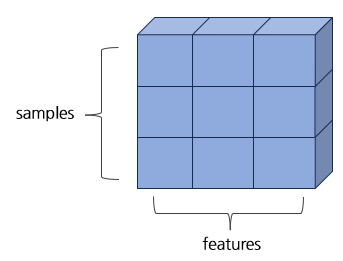

In [28]:
t2 = torch.tensor([[1, 2, 3],
                   [4, 5, 6],
                   [7, 8, 9]])
print(t2.ndim)
print(t2.shape)
print(t2)

2
torch.Size([3, 3])
tensor([[1, 2, 3],
        [4, 5, 6],
        [7, 8, 9]])


#### 3D Tensor
- 큐브(cube)와 같은 모양으로 세 개의 축이 존재
- 데이터가 연속된 시퀀스 데이터나 시간 축이 포함된 시계열 데이터에 해당
- 주식 가격 데이터셋, 시간에 따른 질병 데이터 등이 존재
- 주로 샘플(smaples), 타임스텝(timesteps), 특성(features)을 가진 구조로 사용
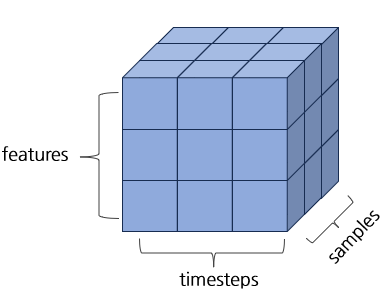

In [31]:
t3 = torch.tensor([[[1, 2, 3],
                   [4, 5, 6],
                   [7, 8, 9]],
                  [[1, 2, 3],
                   [4, 5, 6],
                   [7, 8, 9]],
                  [[1, 2, 3],
                   [4, 5, 6],
                   [7, 8, 9]]])
print(t3.ndim)
print(t3.shape)
print(t3)

3
torch.Size([3, 3, 3])
tensor([[[1, 2, 3],
         [4, 5, 6],
         [7, 8, 9]],

        [[1, 2, 3],
         [4, 5, 6],
         [7, 8, 9]],

        [[1, 2, 3],
         [4, 5, 6],
         [7, 8, 9]]])


#### 4D Tensor
- 4개의 축
- 컬러 이미지 데이터가 대표적인 사례(흑백 이미지 데이터는 3D Tensor로 가능)
- 주로 샘플(samples), 높이(height), 너비(width), 컬러 채널(channel)을 가진 구로조 사용
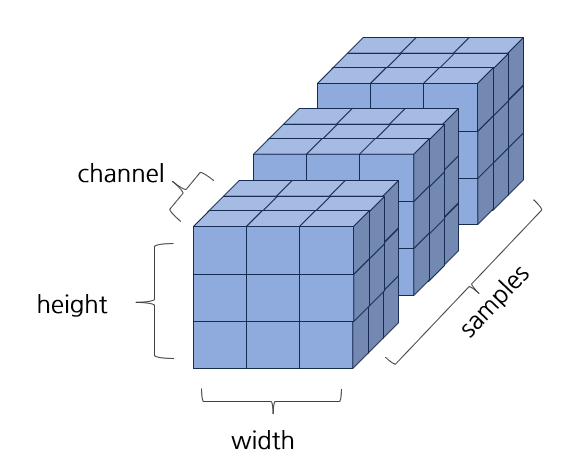

#### 5D Tensor
- 5개의 축
- 비디오 데이터가 대표적인 사례
- 주로 샘플(samples), 프레임(frames), 높이(height), 너비(width), 컬러채널(channel)을 가진 구조로 사용

### 텐서의 연산(Oerations)
- 텐서에 대한 수학 연산, 삼각함수, 비트 연산, 비교 연산, 집계 등 제공

In [34]:
import math

a = torch.rand(1, 2) * 2 - 1
print(a)
print(torch.abs(a)) # 절댓값
print(torch.ceil(a)) # 올림
print(torch.floor(a)) # 내림
print(torch.clamp(a, -0.5, 0.5)) # ~0.5 ~ 0.5 사이의 최소, 최대값을 출력(찝기?)

tensor([[-0.3899,  0.5475]])
tensor([[0.3899, 0.5475]])
tensor([[-0., 1.]])
tensor([[-1.,  0.]])
tensor([[-0.3899,  0.5000]])


clamp() : 초기 텐서 a 값을 최소, 최대값을 지정한다고 생각하면 됨

In [35]:
print(a)
print(torch.min(a)) # 최솟값
print(torch.max(a)) # 최댓값
print(torch.mean(a)) # 평균
print(torch.std(a)) # 표준편차
print(torch.prod(a))  # 곱
print(torch.unique(torch.tensor([1, 2, 3, 1, 2, 2]))) # 유일한 값

tensor([[-0.3899,  0.5475]])
tensor(-0.3899)
tensor(0.5475)
tensor(0.0788)
tensor(0.6629)
tensor(-0.2135)
tensor([1, 2, 3])


- max와 min은 dim인자를 줄 경우 argmax와 argmin도 함께 리턴
    * argmax : 최댓값을 가진 인덱스
    * argmin : 최솟값을 가진 인덱스

In [36]:
x = torch.rand(2, 2)
print(x)
print(x.max(dim=0))
print(x.max(dim=1))

tensor([[0.8211, 0.7396],
        [0.1738, 0.1829]])
torch.return_types.max(
values=tensor([0.8211, 0.7396]),
indices=tensor([0, 0]))
torch.return_types.max(
values=tensor([0.8211, 0.1829]),
indices=tensor([0, 1]))


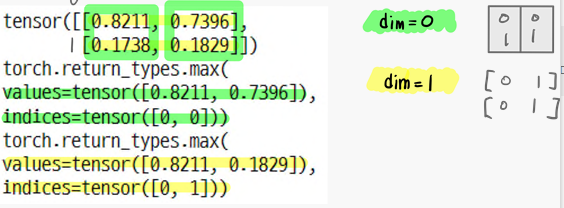

In [37]:
print(x)
print(x.min(dim=0))
print(x.min(dim=1))

tensor([[0.8211, 0.7396],
        [0.1738, 0.1829]])
torch.return_types.min(
values=tensor([0.1738, 0.1829]),
indices=tensor([1, 1]))
torch.return_types.min(
values=tensor([0.7396, 0.1738]),
indices=tensor([1, 0]))


In [38]:
x = torch.rand(2, 2)
print(x)
y = torch.rand(2, 2)
print(y)

tensor([[0.8493, 0.4903],
        [0.3035, 0.2753]])
tensor([[0.1158, 0.7838],
        [0.1176, 0.2429]])


In [39]:
# torch.add : 덧셈
print(x + y)
print(torch.add(x, y))

tensor([[0.9651, 1.2742],
        [0.4212, 0.5182]])
tensor([[0.9651, 1.2742],
        [0.4212, 0.5182]])


In [41]:
# 경고 메시지를 무시하거나 숨기기
import warnings
warnings.filterwarnings(action='ignore')

In [42]:
# 결과 텐서를 인자로 제공
result = torch.empty(2, 4)
torch.add(x, y, out=result)
print(result)

tensor([[0.9651, 1.2742],
        [0.4212, 0.5182]])


- in-0-place 방식
    * in-place 방식으로 텐서의 값을 변경하는 연산 뒤에는 "_"가 붙음
    * x.copy_(y), x.t_()

( 복사한다는 의미 )

In [43]:
print(x)
print(y)
y.add_(x)
print(y)

tensor([[0.8493, 0.4903],
        [0.3035, 0.2753]])
tensor([[0.1158, 0.7838],
        [0.1176, 0.2429]])
tensor([[0.9651, 1.2742],
        [0.4212, 0.5182]])


In [46]:
# torch.sub : 뺄셈
print(x)
print(y)
print(x - y)
print(torch.sub(x, y))
print(x.sub(y))

tensor([[0.8493, 0.4903],
        [0.3035, 0.2753]])
tensor([[0.9651, 1.2742],
        [0.4212, 0.5182]])
tensor([[-0.1158, -0.7838],
        [-0.1176, -0.2429]])
tensor([[-0.1158, -0.7838],
        [-0.1176, -0.2429]])
tensor([[-0.1158, -0.7838],
        [-0.1176, -0.2429]])


In [47]:
# torch.mul : 곱셈
print(x)
print(y)
print(x * y)
print(torch.mul(x, y))
print(x.mul(y))

tensor([[0.8493, 0.4903],
        [0.3035, 0.2753]])
tensor([[0.9651, 1.2742],
        [0.4212, 0.5182]])
tensor([[0.8196, 0.6248],
        [0.1278, 0.1427]])
tensor([[0.8196, 0.6248],
        [0.1278, 0.1427]])
tensor([[0.8196, 0.6248],
        [0.1278, 0.1427]])


In [48]:
# torch.div : 나눗셈
print(x)
print(y)
print(x / y)
print(torch.div(x, y))
print(x.div(y))

tensor([[0.8493, 0.4903],
        [0.3035, 0.2753]])
tensor([[0.9651, 1.2742],
        [0.4212, 0.5182]])
tensor([[0.8800, 0.3848],
        [0.7207, 0.5313]])
tensor([[0.8800, 0.3848],
        [0.7207, 0.5313]])
tensor([[0.8800, 0.3848],
        [0.7207, 0.5313]])


In [52]:
# torch.mm : 내적(dot product)
print(x)
print(y)
print(torch.matmul(x, y))
z = torch.mm(x, y)
print(z)
print(torch.svd(z)) # 행렬값 분해해서 나타내기

tensor([[0.8493, 0.4903],
        [0.3035, 0.2753]])
tensor([[0.9651, 1.2742],
        [0.4212, 0.5182]])
tensor([[1.0261, 1.3362],
        [0.4089, 0.5294]])
tensor([[1.0261, 1.3362],
        [0.4089, 0.5294]])
torch.return_types.svd(
U=tensor([[-0.9294, -0.3690],
        [-0.3690,  0.9294]]),
S=tensor([1.8127e+00, 1.7110e-03]),
V=tensor([[-0.6094,  0.7929],
        [-0.7929, -0.6094]]))


### 텐서의 조작(Manipulations)
- 인덱싱(indexing) : NumPy처럼 인덱싱 형태로 사용가능

In [53]:
x = torch.Tensor([[1, 2],
                  [3, 4]])
print(x)

# 인덱싱
print(x[0, 0])
print(x[0, 1])
print(x[1, 0])
print(x[1, 1])

# 슬라이싱
print(x[:, 0])
print(x[:, 1])

print(x[0, :])
print(x[1, :])

tensor([[1., 2.],
        [3., 4.]])
tensor(1.)
tensor(2.)
tensor(3.)
tensor(4.)
tensor([1., 3.])
tensor([2., 4.])
tensor([1., 2.])
tensor([3., 4.])


- view : 텐서의 크기(size)나 모양(shape)을 변경
  * 기본적으로 변경 전과 후에 텐서 안의 원소 개수가 유지되어야 함
  * -1로 설정되면 계산을 통해 해당 크기값을 유추

In [4]:
# import torch
# import warnings
# warnings.filterwarnings(action='ignore')

x = torch.rand(4,5)
print(x)
y = x.view(20) # flatten
print(y)
z = x.view(5, -1) 
print(z)

tensor([[0.9424, 0.0336, 0.9724, 0.8996, 0.8723],
        [0.7574, 0.3353, 0.3559, 0.4829, 0.2723],
        [0.7637, 0.3139, 0.9849, 0.1676, 0.3406],
        [0.2376, 0.8595, 0.8060, 0.9741, 0.0958]])
tensor([0.9424, 0.0336, 0.9724, 0.8996, 0.8723, 0.7574, 0.3353, 0.3559, 0.4829,
        0.2723, 0.7637, 0.3139, 0.9849, 0.1676, 0.3406, 0.2376, 0.8595, 0.8060,
        0.9741, 0.0958])
tensor([[0.9424, 0.0336, 0.9724, 0.8996],
        [0.8723, 0.7574, 0.3353, 0.3559],
        [0.4829, 0.2723, 0.7637, 0.3139],
        [0.9849, 0.1676, 0.3406, 0.2376],
        [0.8595, 0.8060, 0.9741, 0.0958]])


- item : 텐서에 값이 단 하나라도 존재하면 숫자값을 얻을 수 있음
 * 스칼라값 하나만 존재해야 item() 사용가능

In [5]:
x = torch.rand(1)
print(x)
print(x.item())
print(x.dtype)

tensor([0.1501])
0.15012109279632568
torch.float32


In [6]:
x = torch.rand(2)
print(x)
print(x.item())

tensor([0.6019, 0.1623])


ValueError: only one element tensors can be converted to Python scalars

- squeeze : 차원을 축소(제거)

In [7]:
tensor = torch.rand(1, 3, 3)
print(tensor)
print(tensor.shape)

tensor([[[0.7574, 0.3953, 0.5279],
         [0.0236, 0.9248, 0.1177],
         [0.4942, 0.4047, 0.5443]]])
torch.Size([1, 3, 3])


In [8]:
t = tensor.squeeze() # 3차원에서 2차원으로 축소(제거)
print(t)
print(t.shape)

tensor([[0.7574, 0.3953, 0.5279],
        [0.0236, 0.9248, 0.1177],
        [0.4942, 0.4047, 0.5443]])
torch.Size([3, 3])


- unsqueeze : 차원을 증가(생성)

In [9]:
t = torch.rand(3, 3)
print(t)
print(t.shape)

tensor([[0.2687, 0.1370, 0.2225],
        [0.8571, 0.6186, 0.3792],
        [0.9011, 0.4490, 0.7544]])
torch.Size([3, 3])


In [10]:
tensor = t.unsqueeze(dim=0) # 첫 번째(0) 차원에 대해서 차원을 늘려라
print(tensor)
print(tensor.shape)

tensor([[[0.2687, 0.1370, 0.2225],
         [0.8571, 0.6186, 0.3792],
         [0.9011, 0.4490, 0.7544]]])
torch.Size([1, 3, 3])


In [11]:
tensor = t.unsqueeze(dim=2) # 세 번째(2) 차원에 대해서 차원을 늘려라
print(tensor)
print(tensor.shape)

tensor([[[0.2687],
         [0.1370],
         [0.2225]],

        [[0.8571],
         [0.6186],
         [0.3792]],

        [[0.9011],
         [0.4490],
         [0.7544]]])
torch.Size([3, 3, 1])


- stack : 텐서간 결합

In [12]:
x = torch.FloatTensor([1, 4])
print(x)
y = torch.FloatTensor([2, 5])
print(y)
z = torch.FloatTensor([3, 6])
print(z)
print()
print(torch.stack([x, y, z]))

tensor([1., 4.])
tensor([2., 5.])
tensor([3., 6.])

tensor([[1., 4.],
        [2., 5.],
        [3., 6.]])


- cat : 텐서를 결합하는 메소드(concatenate)
     * 넘파이의 stack과 유사하지만, 쌓을 dim이 존재해야함
     * 해당 차원을 늘려준 후 결합

In [15]:
a = torch.rand(1, 3, 3)
print(a)
b = torch.rand(1, 3, 3)
print(b)
c = torch.cat((a, b), dim=0)
print()
print(c)
print(c.size())

tensor([[[0.2376, 0.8537, 0.7602],
         [0.1867, 0.0617, 0.0152],
         [0.2689, 0.6337, 0.6709]]])
tensor([[[0.6442, 0.6494, 0.3741],
         [0.0079, 0.5444, 0.5452],
         [0.2461, 0.7854, 0.6474]]])

tensor([[[0.2376, 0.8537, 0.7602],
         [0.1867, 0.0617, 0.0152],
         [0.2689, 0.6337, 0.6709]],

        [[0.6442, 0.6494, 0.3741],
         [0.0079, 0.5444, 0.5452],
         [0.2461, 0.7854, 0.6474]]])
torch.Size([2, 3, 3])


In [16]:
c = torch.cat((a, b), dim=1)
print(c)
print(c.size())

tensor([[[0.2376, 0.8537, 0.7602],
         [0.1867, 0.0617, 0.0152],
         [0.2689, 0.6337, 0.6709],
         [0.6442, 0.6494, 0.3741],
         [0.0079, 0.5444, 0.5452],
         [0.2461, 0.7854, 0.6474]]])
torch.Size([1, 6, 3])


In [17]:
c = torch.cat((a, b), dim=2)
print(c)
print(c.size())

tensor([[[0.2376, 0.8537, 0.7602, 0.6442, 0.6494, 0.3741],
         [0.1867, 0.0617, 0.0152, 0.0079, 0.5444, 0.5452],
         [0.2689, 0.6337, 0.6709, 0.2461, 0.7854, 0.6474]]])
torch.Size([1, 3, 6])


- chunk : 텐서를 여러 개로 나눌 때 사용(몇 개로 나눌 것인가?)

In [20]:
tensor = torch.rand(3, 6)
print(tensor)

t1, t2, t3 = torch.chunk(tensor, 3, dim=1)
print(t1)
print(t2)
print(t3)

tensor([[0.9187, 0.1408, 0.4105, 0.0365, 0.4238, 0.8179],
        [0.7495, 0.3570, 0.3925, 0.3501, 0.6332, 0.6716],
        [0.2788, 0.4541, 0.3128, 0.6858, 0.7167, 0.7488]])
tensor([[0.9187, 0.1408],
        [0.7495, 0.3570],
        [0.2788, 0.4541]])
tensor([[0.4105, 0.0365],
        [0.3925, 0.3501],
        [0.3128, 0.6858]])
tensor([[0.4238, 0.8179],
        [0.6332, 0.6716],
        [0.7167, 0.7488]])


- 'split' : 'chunk'와 동일한 기능인지만 조금 다름(텐서의 크기는 몇인가?)

In [21]:
tensor = torch.rand(3, 6)
t1, t2 = torch.split(tensor, 3, dim=1)
print(tensor)
print(t1)
print(t2)

tensor([[0.3368, 0.9901, 0.0436, 0.8935, 0.3689, 0.3048],
        [0.2553, 0.4405, 0.7664, 0.1233, 0.1484, 0.1382],
        [0.8396, 0.0823, 0.6748, 0.5084, 0.3342, 0.4504]])
tensor([[0.3368, 0.9901, 0.0436],
        [0.2553, 0.4405, 0.7664],
        [0.8396, 0.0823, 0.6748]])
tensor([[0.8935, 0.3689, 0.3048],
        [0.1233, 0.1484, 0.1382],
        [0.5084, 0.3342, 0.4504]])


### torch ↔ numpy
- Torch Tensor(텐서)를 NumPy array(배열)로 변환 가능
    * numpy()
    * from_numpy()
- Tensor가 CPU상에 있다면 NumPy 배열은 메모리 공간을 공유하므로 하나가 변하면, 다른 하나도 변함

In [22]:
a = torch.ones(7)
print(a)

tensor([1., 1., 1., 1., 1., 1., 1.])


In [23]:
b = a.numpy()
print(b)

[1. 1. 1. 1. 1. 1. 1.]


In [25]:
a.add_(1) # torch로 선언한 값
print(a)
print(b)
# 결과값 이유 -> 메모리를 공유하고 있어서 

tensor([3., 3., 3., 3., 3., 3., 3.])
[3. 3. 3. 3. 3. 3. 3.]


In [26]:
import numpy as np

a = np.ones(7)
b = torch.from_numpy(a)
np.add(a, 1, out=a) # a.add_(1) 와 같은 내용
print(a)
print(b)

[2. 2. 2. 2. 2. 2. 2.]
tensor([2., 2., 2., 2., 2., 2., 2.], dtype=torch.float64)


## Autograd(자동미분)
- torch.autograd 패키지는 Tensor의 모든 연산에 대해 자동 미분 제공
- 이는 코드를 어떻게 작성하여 실행하느냐에 따라 역전파가 정의된다는 뜻
- backprop를 위해 미분값을 자동으로 계산

requires_grad 속성을 True로 설정하면, 해당 텐서에서 이루어지는 모든 연산들을 추적하기 시작

기록을 추적하는 것을 중단하게 하려면, .detach()를 호출하여 연산기록으로부터 분리

In [27]:
a = torch.rand(3, 3)
a = a * 3
print(a)
print(a.requires_grad)

tensor([[1.5558, 2.3554, 0.0122],
        [1.2551, 0.6734, 2.4598],
        [2.1778, 2.4147, 1.3420]])
False


- requires_grad_(...)는 기존 텐서의 requires_grad 값을 바꿔치기(in-place)하여 변경
- grad_fn : 미분값을 계산한 함수에 대한 정보 저장(어떤 함수에 대해서 backprop 했는지)

In [28]:
a.requires_grad_(True) # _(under bar)는 in-place연산
print(a.requires_grad)

b = (a * a).sum() # 텐서를 곱하고 전체 합을 구함
print(b)
print(b.grad_fn) # fn : function

True
tensor(28.4224, grad_fn=<SumBackward0>)


## 기울기(Gradient)

In [29]:
x = torch.ones(3, 3, requires_grad=True)
print(x)

tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]], requires_grad=True)


In [30]:
y = x + 5
print(y)

tensor([[6., 6., 6.],
        [6., 6., 6.],
        [6., 6., 6.]], grad_fn=<AddBackward0>)


In [31]:
z = y * y
out = z.mean()
print(z, out)

tensor([[36., 36., 36.],
        [36., 36., 36.],
        [36., 36., 36.]], grad_fn=<MulBackward0>) tensor(36., grad_fn=<MeanBackward0>)


계산이 완료된 후, backward()를 호출하면 자동으로 역전파 계산이 가능하고, .grad 속성에 누적됨

In [32]:
print(out)
out.backward()

tensor(36., grad_fn=<MeanBackward0>)


grad : data가 거쳐온 layer에 대한 미분값 저장

In [34]:
print(x)
print(x.grad) # 미분값이 자동으로 입력됨

tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]], requires_grad=True)
tensor([[1.3333, 1.3333, 1.3333],
        [1.3333, 1.3333, 1.3333],
        [1.3333, 1.3333, 1.3333]])


In [35]:
# 다른 예제
x = torch.rand(3, requires_grad=True)
y = x * 2

while y.data.norm() < 1000: # y 값이 1000 미만일 경우
    y = y * 2

print(y)

tensor([ 55.7158, 910.9940, 724.6478], grad_fn=<MulBackward0>)


In [37]:
v = torch.tensor([0.1, 1.0, 0.0001], dtype=torch.float)
y.backward(v)

print(x.grad)

tensor([2.0480e+02, 2.0480e+03, 2.0480e-01])


with torch.no_grad()를 사용하여 기울기의 업데이트를 하지 않음

기록을 추적하는 것을 방지하기 위해 코드 블럭을 with torch.no_grad()로 감싸면 기울기 계산은 필요 없지만, requires_grad = True로 설정되어 학습 가능한 매개변수를 갖는 모델을 평가(evaluate)할 때 유용

In [38]:
print(x.requires_grad)
print((x ** 2).requires_grad)

# 기울기 계산 안할 때 사용
with torch.no_grad():
    print((x ** 2).requires_grad)

True
True
False


detach() : 내용물(content)은 같지만 requires_grad가 다른 새로운 Tensor를 가져올 때

In [39]:
print(x.requires_grad)
y = x.detach()
print(y.requires_grad)
print(x.eq(y).all())

True
False
tensor(True)


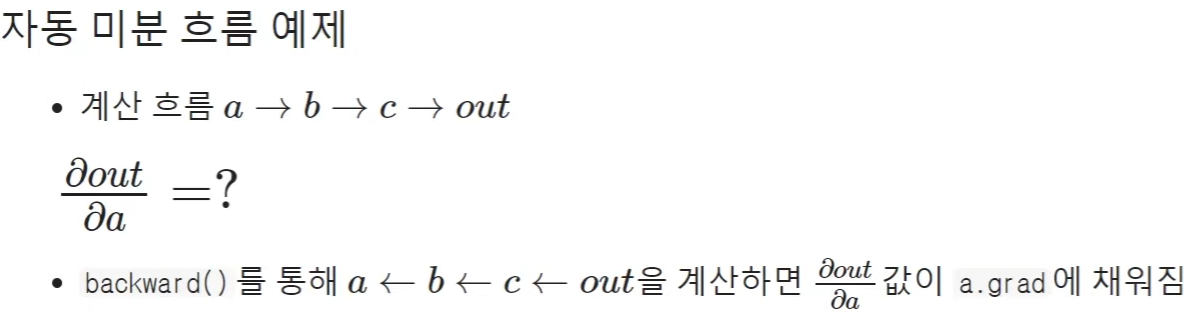

In [40]:
a = torch.ones(2, 2)
print(a)

tensor([[1., 1.],
        [1., 1.]])


In [41]:
a = torch.ones(2, 2, requires_grad=True)
print(a)

tensor([[1., 1.],
        [1., 1.]], requires_grad=True)


In [42]:
print(a.data)
print(a.grad)
print(a.grad_fn)

tensor([[1., 1.],
        [1., 1.]])
None
None


텐서에 대한 연산이 없고 초기화 된 상태라서 grad, grad_fn은 None값을 나타냄

In [43]:
# add 연산
b = a + 2
print(b)

tensor([[3., 3.],
        [3., 3.]], grad_fn=<AddBackward0>)


In [44]:
# power 연산
c = b ** 2
print(c)

tensor([[9., 9.],
        [9., 9.]], grad_fn=<PowBackward0>)


In [45]:
out = c.sum()
print(out)

tensor(36., grad_fn=<SumBackward0>)


In [46]:
print(out)
out.backward()

tensor(36., grad_fn=<SumBackward0>)


a의 grad_fn이 None인 이유는 직접적으로 계산한 부분이 없었기 때문

In [47]:
print(a.data)
print(a.grad)
print(a.grad_fn)

tensor([[1., 1.],
        [1., 1.]])
tensor([[6., 6.],
        [6., 6.]])
None


In [48]:
print(b.data)
print(b.grad)
print(b.grad_fn)

tensor([[3., 3.],
        [3., 3.]])
None


In [49]:
print(c.data)
print(c.grad)
print(c.grad_fn)

tensor([[9., 9.],
        [9., 9.]])
None


In [50]:
print(out.data)
print(out.grad)
print(out.grad_fn)

tensor(36.)
None
